In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [4]:
def load_data(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels.gz'% kind)
    images_path = os.path.join(path,
                               '%s-images.gz'% kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

X_train, y_train = load_data('E:/term7/ML/FinalProject/Project/Project', kind='train')
X_test, y_test = load_data('E:/term7/ML/FinalProject/Project/Project', kind='test')

In [5]:
#split data to train and validation
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_val, y_train ,y_val=train_test_split(X_train, y_train, test_size=0.25, random_state=40, stratify=y_train)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)


(45000, 784)
(45000,)
(15000, 784)
(15000,)
(10000, 784)
(10000,)


In [89]:
#plt.figure(figsize=(20,2))

#for i in range(20):
    #plt.subplot(1,20,i+1)
    #plt.imshow(X_train[i].reshape(28,28),cmap='binary')
    #plt.title('%d' % y_train[i])
    #plt.axis('off')

In [8]:
num_classes= 10
input_shape=(28,28,1)
X_train=X_train.astype("float32")/255
X_val=X_val.astype("float32")/255
X_test=X_test.astype("float32")/255

In [9]:
#Convert class Vectors to Binary class matrics
y_train = keras.utils.to_categorical(y_train , num_classes)
y_val = keras.utils.to_categorical(y_val , num_classes)
y_test = keras.utils.to_categorical(y_test , num_classes)

In [97]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Input
 
#define the model 

model = Sequential()
model.add(Input(X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))
#model.add(Dense(500))
#model.add(Activation('sigmoid'))
#model.add(Dropout(0.2))
#model.add(Dense(200))
#model.add(Activation('sigmoid'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes , activation='softmax'))
#model.summary()

In [98]:
model.compile(loss="categorical_crossentropy" ,  metrics=["accuracy"])
batch_size=128
epochs=20
My_model=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/20
352/352 [==============================] - 8s 20ms/step - loss: 0.8897 - accuracy: 0.6921 - val_loss: 0.5183 - val_accuracy: 0.8119
Epoch 2/20
352/352 [==============================] - 7s 20ms/step - loss: 0.4670 - accuracy: 0.8297 - val_loss: 0.4454 - val_accuracy: 0.8335
Epoch 3/20
352/352 [==============================] - 7s 20ms/step - loss: 0.4123 - accuracy: 0.8472 - val_loss: 0.3988 - val_accuracy: 0.8533
Epoch 4/20
352/352 [==============================] - 6s 17ms/step - loss: 0.3884 - accuracy: 0.8572 - val_loss: 0.3856 - val_accuracy: 0.8577
Epoch 5/20
352/352 [==============================] - 6s 17ms/step - loss: 0.3645 - accuracy: 0.8665 - val_loss: 0.3780 - val_accuracy: 0.8626
Epoch 6/20
352/352 [==============================] - 6s 16ms/step - loss: 0.3512 - accuracy: 0.8696 - val_loss: 0.3938 - val_accuracy: 0.8566
Epoch 7/20
352/352 [==============================] - 6s 17ms/step - loss: 0.3292 - accuracy: 0.8798 - val_loss: 0.3875 - val_accuracy: 0.8586

In [99]:
My_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

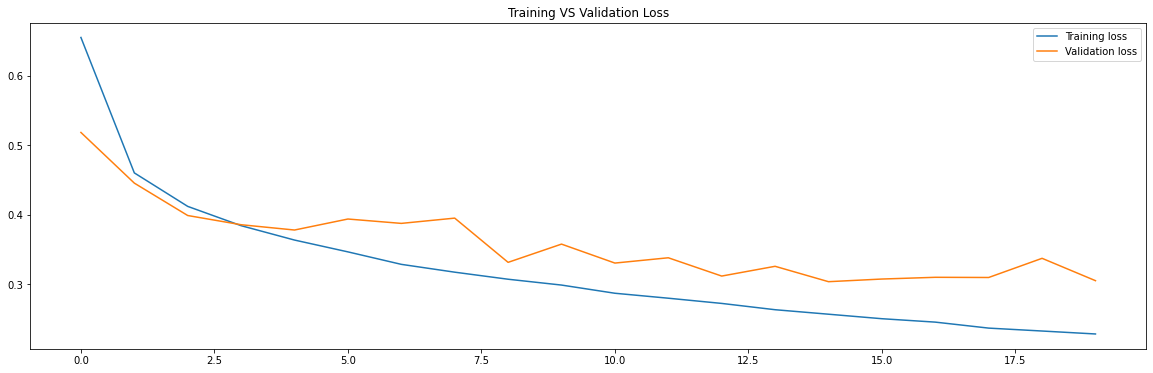

In [100]:
plt.figure(figsize=(20,6))
plt.plot(My_model.history['loss'],label="Training loss")
plt.plot(My_model.history['val_loss'],label="Validation loss")
plt.legend()
plt.title("Training VS Validation Loss")
plt.show()

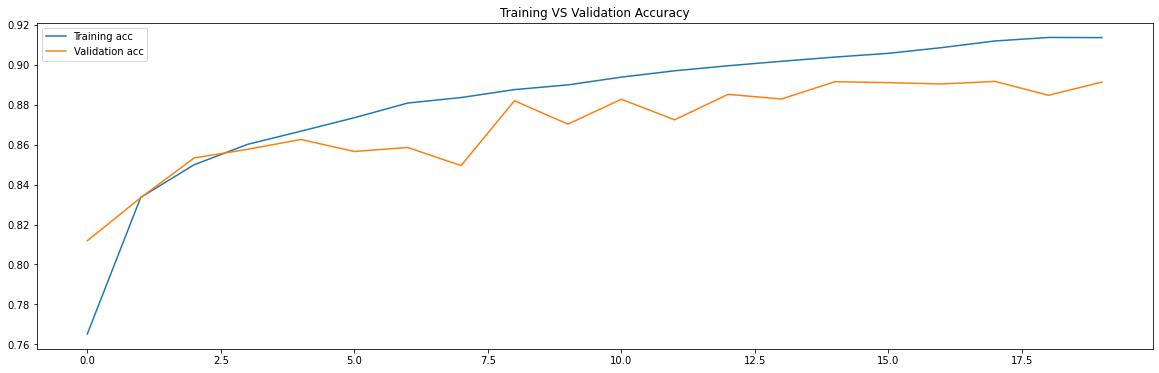

In [101]:
plt.figure(figsize=(20,6))
plt.plot(My_model.history['accuracy'],label="Training acc")
plt.plot(My_model.history['val_accuracy'],label="Validation acc")
plt.legend()
plt.title("Training VS Validation Accuracy")
plt.show()

In [102]:
score = model.evaluate(X_test , y_test, verbose=0)
print(f"Test loss= {score[0]} ")
print(f"Test accuracy= {score[1]} ")

Test loss= 0.34494873881340027 
Test accuracy= 0.8801000118255615 


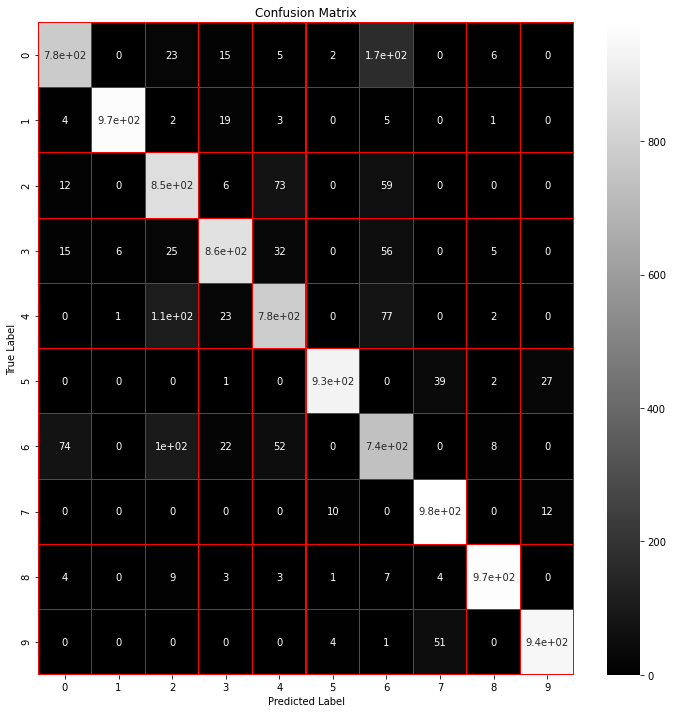

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=model.predict(X_test)

y_pred_classes=np.argmax(y_pred, axis= 1)
y_true= np.argmax(y_test, axis= 1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(confusion_mtx, annot= True, linewidths= 0.1, cmap= "gist_yarg_r", linecolor= "r")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# Covolutional Neural Network

In [29]:
X_train=X_train.reshape(-1,28,28,1)
X_val=X_val.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Input,Conv2D,MaxPooling2D
model=keras.Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(32,kernel_size=(3,3),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(num_classes , activation='softmax'))
#model.summary()

In [49]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" , metrics=["accuracy"])
batch_size=128
epochs=20
My_model=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/20
352/352 [==============================] - 27s 71ms/step - loss: 0.9068 - accuracy: 0.6770 - val_loss: 0.4035 - val_accuracy: 0.8556
Epoch 2/20
352/352 [==============================] - 23s 67ms/step - loss: 0.4171 - accuracy: 0.8542 - val_loss: 0.3523 - val_accuracy: 0.8734
Epoch 3/20
352/352 [==============================] - 24s 67ms/step - loss: 0.3631 - accuracy: 0.8726 - val_loss: 0.3280 - val_accuracy: 0.8803
Epoch 4/20
352/352 [==============================] - 25s 71ms/step - loss: 0.3249 - accuracy: 0.8834 - val_loss: 0.2931 - val_accuracy: 0.8943
Epoch 5/20
352/352 [==============================] - 24s 69ms/step - loss: 0.3031 - accuracy: 0.8922 - val_loss: 0.2821 - val_accuracy: 0.8963
Epoch 6/20
352/352 [==============================] - 25s 71ms/step - loss: 0.2737 - accuracy: 0.9020 - val_loss: 0.2876 - val_accuracy: 0.8953
Epoch 7/20
352/352 [==============================] - 24s 68ms/step - loss: 0.2631 - accuracy: 0.9050 - val_loss: 0.2665 - val_accuracy:

In [46]:
My_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

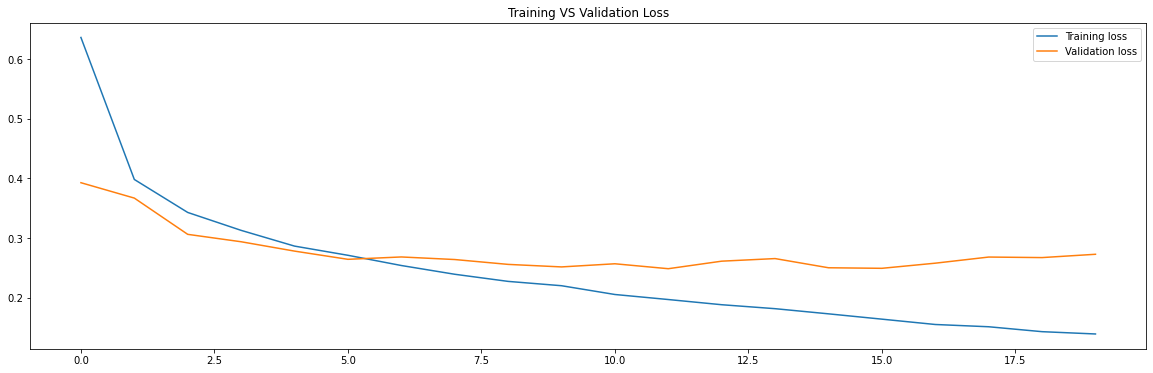

In [34]:
plt.figure(figsize=(20,6))
plt.plot(My_model.history['loss'],label="Training loss")
plt.plot(My_model.history['val_loss'],label="Validation loss")
plt.legend()
plt.title("Training VS Validation Loss")
plt.show()

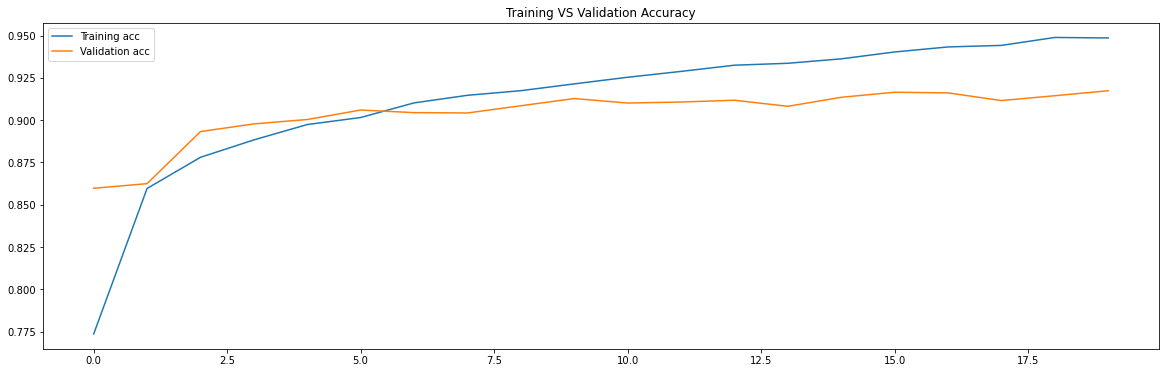

In [35]:
plt.figure(figsize=(20,6))
plt.plot(My_model.history['accuracy'],label="Training acc")
plt.plot(My_model.history['val_accuracy'],label="Validation acc")
plt.legend()
plt.title("Training VS Validation Accuracy")
plt.show()

In [47]:
score = model.evaluate(X_test , y_test, verbose=0)
print(f"Test loss= {score[0]} ")
print(f"Test accuracy= {score[1]} ")

Test loss= 0.6712359189987183 
Test accuracy= 0.7444999814033508 


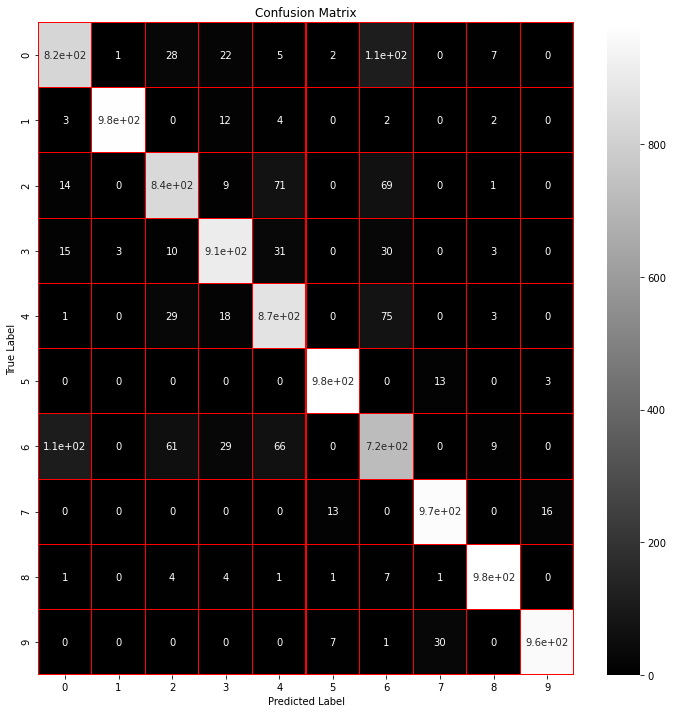

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=model.predict(X_test)

y_pred_classes=np.argmax(y_pred, axis= 1)
y_true= np.argmax(y_test, axis= 1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(confusion_mtx, annot= True, linewidths= 0.1, cmap= "gist_yarg_r", linecolor= "r")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

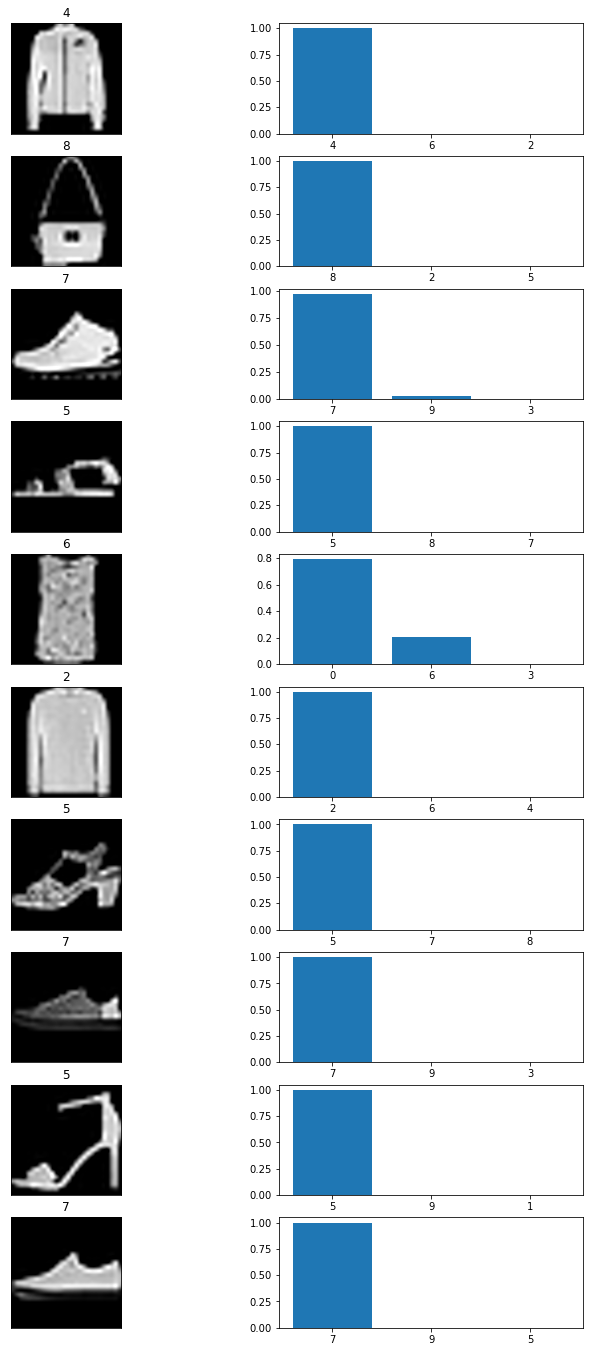

In [98]:
class_names=['0','1','2','3','4','5','6','7','8','9']
yy_test=np.argmax(y_test, axis=1 )
plt.figure(figsize=(12,24))
idx= np.random.choice(len(X_test), 10, replace= False)

p=model.predict(X_test[idx])

for i in range (len(idx)):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(X_test[idx[i]],interpolation= 'spline16', cmap= 'gray')
    plt.title(class_names[yy_test[idx[i]]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred_label= np.argsort(-p[i])[:3]
    pred_prob= [p[i][l] for l in pred_label]
    pred_label= [class_names[l] for l in pred_label]
    
    plt.subplot(10,2,2*i+2)
    plt.bar(range(3),pred_prob)
    plt.xticks(range(3),pred_label)
    
plt.show()
    
    
    